# matplotlibの初期化、Company IDの読み込み

In [2]:
# 記事では書いていない、matplotlibの日本語処理用

import matplotlib.pyplot as plt

#plt.rcParams['font.family']='Hiragino Sans'# フォント設定
#plt.rcParams['font.weight']='bold' # 太さ
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 20
plt.rcParams["figure.figsize"]=15,15

# 取得したCompany Identifiers保存したり読み込む場合
import pickle

# 読み込み
with open('company_dict', mode='rb') as f:
    company_dict = pickle.load(f)

# 書き込み
#with open("company_dict", mode="wb") as f:
#    pickle.dump(company_dict, f)

#company_dict

## BLEデータを取得する (秒数を指定する)

In [3]:
from bleak import BleakScanner; from datetime import datetime, timedelta; import asyncio

def process_manufacturer_data(manufacturer_data):
    result = {}
    for manufacturer_id, data_bytes in manufacturer_data.items():
        manufacturer_id_hex = f"0x{manufacturer_id:04X}" # 製造者IDを2バイト0x****形式に変換
        data_array = [byte for byte in data_bytes]       # バイト列を数値配列に変換
        result[manufacturer_id_hex] = data_array         # 結果を辞書に格納
    return result

def detection_callback(device, advertisement_data):
    manufacturer_data=process_manufacturer_data( advertisement_data.manufacturer_data )
    manufacturer_data["company_id"]=list(manufacturer_data.keys())[0]
    manufacturer_data["company"]=company_dict[manufacturer_data["company_id"]]
    manufacturer_data['datetime'] = datetime.now() # 取得時間も保持しておく
    manufacturer_data["device"]=str(device)        # デバイス表記も保持する
    manufacturer_data_list.append(manufacturer_data)

async def scan_ble(): # Jupyter対応（イベントループの確認と回避）にasyncにする
    scanner = BleakScanner(detection_callback)
    # 秒数を指定(10秒)
    await scanner.start(); await asyncio.sleep(10); await scanner.stop() 
    # 秒数を指定(300秒)
    #await scanner.start(); await asyncio.sleep(300); await scanner.stop()

manufacturer_data_list = []
try:
    await scan_ble()
except RuntimeError:
    import nest_asyncio; nest_asyncio.apply(); await scan_ble()
    
manufacturer_data_list

[{'0x0006': [1,
   9,
   32,
   34,
   219,
   3,
   159,
   212,
   81,
   91,
   38,
   19,
   250,
   231,
   159,
   108,
   36,
   4,
   85,
   69,
   2,
   28,
   129,
   75,
   241,
   41,
   174],
  'company_id': '0x0006',
  'company': 'Microsoft',
  'datetime': datetime.datetime(2025, 8, 10, 9, 31, 32, 379344),
  'device': '20085A44-F5E3-7C91-D397-9E4129FC739A: None'},
 {'0x004C': [16, 5, 10, 28, 81, 135, 52],
  'company_id': '0x004C',
  'company': 'Apple, Inc.',
  'datetime': datetime.datetime(2025, 8, 10, 9, 31, 32, 653024),
  'device': '900E416C-017F-8116-AE46-FCBCDF0B1580: None'},
 {'0x05A7': [6, 0, 18, 32, 41, 0, 202, 0, 0, 32, 0, 0, 0, 0, 0, 0, 0],
  'company_id': '0x05A7',
  'company': 'Sonos Inc',
  'datetime': datetime.datetime(2025, 8, 10, 9, 31, 32, 666926),
  'device': '5447B18D-B39B-105D-C1C6-888076711ABF: None'},
 {'0x05A7': [6,
   0,
   18,
   32,
   41,
   0,
   202,
   0,
   0,
   32,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   152,
   231,
   130,
   151,
  

In [4]:
# 受信したデータ形式を変換して確認する（記事では未使用）

for manufacturer_data in manufacturer_data_list:
    manufacturer_data['device']=str(manufacturer_data['device'])

manufacturer_data_list

[{'0x0006': [1,
   9,
   32,
   34,
   219,
   3,
   159,
   212,
   81,
   91,
   38,
   19,
   250,
   231,
   159,
   108,
   36,
   4,
   85,
   69,
   2,
   28,
   129,
   75,
   241,
   41,
   174],
  'company_id': '0x0006',
  'company': 'Microsoft',
  'datetime': datetime.datetime(2025, 8, 10, 9, 31, 32, 379344),
  'device': '20085A44-F5E3-7C91-D397-9E4129FC739A: None'},
 {'0x004C': [16, 5, 10, 28, 81, 135, 52],
  'company_id': '0x004C',
  'company': 'Apple, Inc.',
  'datetime': datetime.datetime(2025, 8, 10, 9, 31, 32, 653024),
  'device': '900E416C-017F-8116-AE46-FCBCDF0B1580: None'},
 {'0x05A7': [6, 0, 18, 32, 41, 0, 202, 0, 0, 32, 0, 0, 0, 0, 0, 0, 0],
  'company_id': '0x05A7',
  'company': 'Sonos Inc',
  'datetime': datetime.datetime(2025, 8, 10, 9, 31, 32, 666926),
  'device': '5447B18D-B39B-105D-C1C6-888076711ABF: None'},
 {'0x05A7': [6,
   0,
   18,
   32,
   41,
   0,
   202,
   0,
   0,
   32,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   152,
   231,
   130,
   151,
  

## BLEで受信したデータを一時保存 or 読み込み

In [5]:
for manufacturer_data in manufacturer_data_list:
    print(manufacturer_data["company"], manufacturer_data['device'].split(":")[-1])

Microsoft  None
Apple, Inc.  None
Sonos Inc  None
Sonos Inc  S27 8B9C LE
Apple, Inc.  i14b
Apple, Inc.  i14b
Apple, Inc.  None
Sonos Inc  S27 8B9C LE
Sonos Inc  S27 8B9C LE
Apple, Inc.  None
Sonos Inc  S27 8B9C LE
Sonos Inc  S27 8B9C LE
Microsoft  None
Microsoft  None
Microsoft  None
Sonos Inc  S27 8B9C LE
Sonos Inc  S27 8B9C LE
Apple, Inc.  None
Microsoft  None
Sonos Inc  S27 8B9C LE
Sonos Inc  S27 8B9C LE
Apple, Inc.  None
Apple, Inc.  None
Microsoft  None
Apple, Inc.  i14b
Apple, Inc.  i14b
Microsoft  None
Sonos Inc  S27 8B9C LE
Sonos Inc  S27 8B9C LE
Microsoft  None
Microsoft  None
Sonos Inc  S27 8B9C LE
Sonos Inc  S27 8B9C LE
Microsoft  None
Microsoft  None
Apple, Inc.  None
Apple, Inc.  None
Sonos Inc  S27 8B9C LE
Sonos Inc  S27 8B9C LE
Microsoft  None
Microsoft  None
Apple, Inc.  i14b
Apple, Inc.  i14b
Microsoft  None
Apple, Inc.  None
Apple, Inc.  None
Sonos Inc  S27 8B9C LE
Sonos Inc  S27 8B9C LE


In [6]:
# 取得したデータを一時保存したり読み込んだり
import pickle

# 読み込み
#with open('manufacturer_data_list_4_sijo_horikawa', mode='rb') as f:
#    manufacturer_data_list = pickle.load(f)
#manufacturer_data_list

# 書き込み
with open("manufacturer_data_list_1_sagamihara", mode="wb") as f:
    pickle.dump(manufacturer_data_list, f)

## 高度化PICSデータ処理関数

In [17]:
import struct

def process_pics(data):
    pics_info = {}
    pics_info['product_id'] = 256*data[0]+data[1] # 0,1: ProductID (2バイト)
    msg_type=data[2] # 2: メッセージタイプ (1バイト): 0, 1, 2のいずれか
    pics_info['message_type'] = msg_type 
    pics_info['message_id'] = data[3] # 3: メッセージID (1バイト): 連番として使用
    # 4,5 は読み飛ばす
    # 6,7,8,9: 交差点ID (4バイト)
    pics_info['intersection_id'] = \
        "".join([hex(num)[2:].upper().zfill(2) for num in data[6:10]])
    if msg_type == 0:   # ========= タイプ0: デバイス識別情報
        identifier = data[10:10+14]
        #pics_info['is_valid_identifier'] = identifier
        if identifier==[85, 84, 77, 83, 95, 80, 73, 67, 83, 48, 48, 48, 49, 0]:
            pics_info['is_valid_identifier'] = "UTMS_PICS0001"
    elif msg_type == 1: # ========= タイプ1: 位置情報およびシグナル制御情報
        # 10,11,12,13: 緯度 (4バイト): 値を1,000,000で割って実際の緯度に変換
        latitude = struct.unpack('>i', bytes(data[10:14]))[0] / 1_000_000.0
        pics_info['latitude'] = latitude
        # 14,15,16,17: 経度 (4バイト): 値を1,000,000で割って実際の経度に変換
        longitude = struct.unpack('>i', bytes(data[14:18]))[0] / 1_000_000.0
        pics_info['longitude'] = longitude
        # 18: 半径 (1バイト): 255の場合はInteger.MAX_VALUEとして解釈
        radius = data[18]
        pics_info['radius'] = 256 if radius == 255 else radius
        # 19: チャネル1信号制御タイプ (1バイト):
        # 上位2ビット: 制御タイプ
        control_byte1 = data[19]; control_type1 = (control_byte1 >> 6) & 0x03
        control_type1_name = {0: 'None',1: 'RingExtension',2: 'Other',3: 'Unknown'
        }.get(control_type1, 'Unknown')
        # 下位6ビット: 各歩行者信号のフラグ
        pedestrian_signals_ch1 = []
        for i in range(6):
            is_controlled = ((control_byte1 >> i) & 0x01) != 0
            signal_control_type = control_type1_name if is_controlled else 'None'
            if is_controlled and control_type1_name == 'None':
                signal_control_type = 'RingExtension'  # 特殊ケース処理
            pedestrian_signals_ch1.append({
               'index': i,
               'is_controlled': is_controlled,
               'control_type': signal_control_type
            })
        # チャネル1信号制御タイプを格納
        pics_info['signal_control_channel1'] = {'type': control_type1_name,
        'pedestrian_signals': pedestrian_signals_ch1}
        # 20: チャネル1信号制御タイプ (1バイト):
        # 上位2ビット: 制御タイプ
        control_byte2 = data[20]; control_type2 = (control_byte2 >> 6) & 0x03
        control_type2_name = {0: 'None',1: 'RingExtension',2: 'Other',3: 'Unknown'
        }.get(control_type2, 'Unknown')
        # 下位6ビット: 各歩行者信号のフラグ
        pedestrian_signals_ch2 = []
        for i in range(6):
            is_controlled = ((control_byte2 >> i) & 0x01) != 0
            signal_control_type = control_type2_name if is_controlled else 'None'
            if is_controlled and control_type2_name == 'None':
                signal_control_type = 'RingExtension'  # 特殊ケース処理
            pedestrian_signals_ch2.append({'index': i,
                'is_controlled': is_controlled,
                'control_type': signal_control_type})
        # チャネル1信号制御タイプを格納
        pics_info['signal_control_channel2'] = {'type': control_type2_name,
           'pedestrian_signals': pedestrian_signals_ch2}
        # 21,22: 未使用
        # 23: 世代番号 (1バイト)
        pics_info['generation_number'] = data[23]
    elif msg_type == 2: # ========= タイプ2: 信号状態情報
        pedestrian_signals = []
        # 10,11,12,13,14,15 : 6つの歩行者信号の状態 (各1バイト)
        for i in range(6): 
            signal_byte = data[10 + i]
            # 上位4ビット: 残り時間（8以上は-1として解釈）
            remaining_time = int( (signal_byte  >> 4) & 0x0F )
            # 下位4ビット: 信号状態
            signal_state = int(signal_byte  & 0x0F)
            signal_info = {
                #'index': i,
                'remaining_time': -1 if remaining_time >= 8 else remaining_time + 1,
                'signal_state': {
                    0: 'NoSignal',
                    1: 'Red',
                    2: 'BlinkGreen',
                    3: 'Green', 
                    4: 'None'
                }.get(signal_state, 'Unknown'),
                'speaker_enable': False  # デフォルト値（後で更新）
            }
            pedestrian_signals.append(signal_info)
        pics_info['pedestrian_signals'] = pedestrian_signals
    return pics_info

## 高度化PICSデータをパースする

In [22]:
pics_info_list=[]; TARGET_COMPANY_ID = '0x01CE' # 'HOUWA SYSTEM DESIGN, k.k.'
for manufacturer_data in manufacturer_data_list:
    company_id=list(manufacturer_data.keys())[0]
    if company_id == TARGET_COMPANY_ID:
        pics_info=process_pics(manufacturer_data[company_id])
        pics_info['datetime']=manufacturer_data['datetime']
        pics_info_list.append(pics_info)
        print(pics_info)

#print(pics_info_list)

{'product_id': 22529, 'message_type': 0, 'message_id': 252, 'intersection_id': '018CBA98', 'is_valid_identifier': 'UTMS_PICS0001', 'datetime': datetime.datetime(2025, 5, 1, 16, 51, 33, 489268)}
{'product_id': 22529, 'message_type': 2, 'message_id': 11, 'intersection_id': '018CBA98', 'pedestrian_signals': [{'remaining_time': -1, 'signal_state': 'Red', 'speaker_enable': False}, {'remaining_time': -1, 'signal_state': 'BlinkGreen', 'speaker_enable': False}, {'remaining_time': -1, 'signal_state': 'Unknown', 'speaker_enable': False}, {'remaining_time': -1, 'signal_state': 'Unknown', 'speaker_enable': False}, {'remaining_time': -1, 'signal_state': 'Unknown', 'speaker_enable': False}, {'remaining_time': -1, 'signal_state': 'Unknown', 'speaker_enable': False}], 'datetime': datetime.datetime(2025, 5, 1, 16, 51, 35, 34907)}
{'product_id': 22529, 'message_type': 0, 'message_id': 28, 'intersection_id': '018CBA98', 'is_valid_identifier': 'UTMS_PICS0001', 'datetime': datetime.datetime(2025, 5, 1, 16,

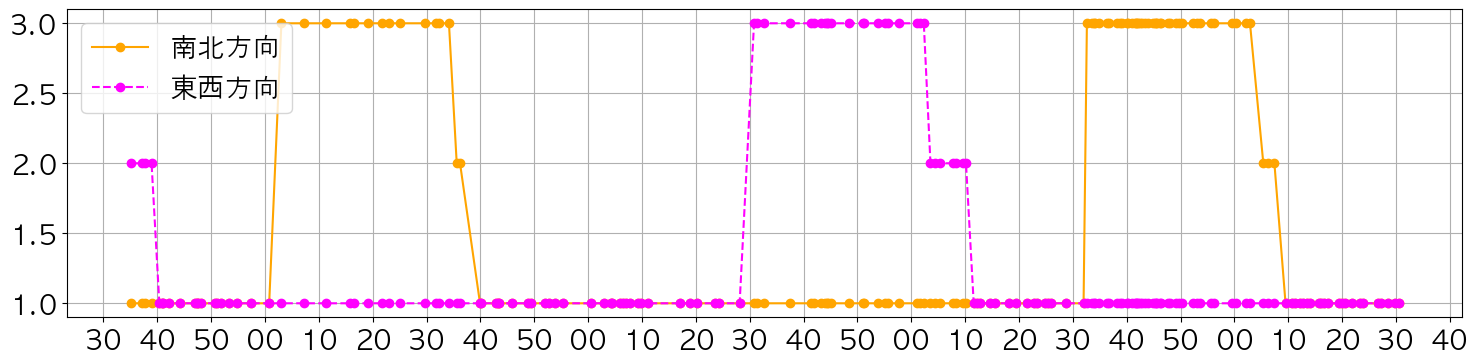

In [19]:
import matplotlib.pyplot as plt; import matplotlib.ticker as ticker

x=[];y1=[];y2=[]
for pics_info in pics_info_list:
    if pics_info['message_type']==2:
        x.append(pics_info['datetime'])
        signal_state=pics_info['pedestrian_signals'][0]['signal_state']
        y1.append({'NoSignal':0,'Red':1,'BlinkGreen':2,'Green':3,'None':4}.get(signal_state))
        signal_state=pics_info['pedestrian_signals'][1]['signal_state']
        y2.append({'NoSignal':0,'Red':1,'BlinkGreen':2,'Green':3,'None':4}.get(signal_state))
plt.figure(figsize=(18,4)) # 散布図の作成
plt.plot(x, y1, label='南北方向', color='orange',marker='o',)
plt.plot(x, y2, label='東西方向', color='magenta',marker='o', linestyle='--')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%S'))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(
    timedelta(seconds=10).total_seconds()/(24*3600)))
plt.legend(loc="upper left"); plt.grid(True, which='both'); plt.show()